# Dataset and Metadata Analysis

In [1]:
import os

FIGURE_FOLDER = 'figures'
if not os.path.exists(FIGURE_FOLDER):
    os.mkdir(FIGURE_FOLDER)

In [2]:
import pandas as pd
df = pd.read_csv('ML_WIFI_preprocessed.csv')
df.head()

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
0,secure user authentication leveraging keystrok...,2022.0,0.0,User authentication plays a critical role in a...,Behavioral features; channel state information...,"Gu Y., Wang Y., Wang M., Pan Z., Hu Z., Liu Z....",Article,secure user authentication leverage keystroke ...
1,data-driven based hvac optimisation approaches...,2022.0,1.0,"Improving the energy efficiency of Heating, Ve...",Air conditioning (HVAC) systems; Artificial in...,"Ala'raj M., Radi M., Abbod M.F., Majdalawieh M...",Review,drive base hvac optimisation approach systemat...
2,enabling efficient wifi-based occupant behavio...,2022.0,0.0,To launch energy-efficient and occupant-centri...,Deep learning; Internet of things; Occupant be...,"Zhou Q., Yang Q., Xing J.",Article,enable efficient base occupant behavior recogn...
3,i-wknn: fast-speed and high-accuracy wifi posi...,2022.0,0.0,Based on various existing wireless fingerprint...,AP selection; Asymmetric Gaussian filtering; I...,"Zhao Z., Lou Z., Wang R., Li Q., Xu X.",Article,wknn fast speed high accuracy positioning inte...
4,using wifi connection counts and camera-based ...,2022.0,1.0,Accurate occupancy information can help in opt...,Building occupancy counts; Day-ahead occupancy...,"Alishahi N., Ouf M.M., Nik-Bakht M.",Article,connection count camera base occupancy count e...


In [3]:
# brutal
idxs = df['Year'].isna()
for i, el in enumerate(idxs):
    if el:
        df['Year'].iloc[i] = df['Year'].iloc[i-1]
df['Year'].isna().sum()

/tmp/ipykernel_55342/1831759709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'].iloc[i] = df['Year'].iloc[i-1]


0

In [4]:
df['Year'] = df['Year'].astype(int)
df['Cited by'] = df['Cited by'].astype(int)
len(df)

3449

In [5]:
# paper count vs years
count_all_df = df['Year'].value_counts().sort_index(ascending=True)
count_all_df.index, count_all_df.values

(Int64Index([1992, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
             2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
            dtype='int64'),
 array([  2,   1,  12,  10,  26,  24,  39,  62,  46,  68,  67,  74, 113,
        102, 180, 251, 363, 567, 591, 754,  97]))

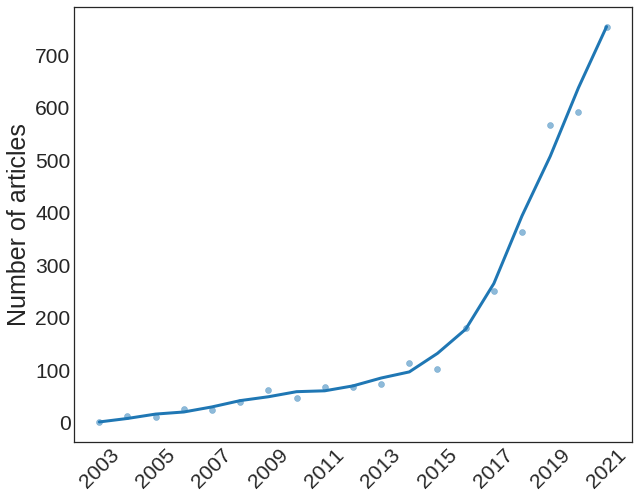

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['image.cmap'] = 'tab10'
import numpy as np

def smooth_list(l):
    return [l[0]] + [np.mean(l[i-1: i+2]) for i, _ in enumerate(l[1:-1], 1)] + [l[-1]]


# remove 2022 and 1992
years, counts = count_all_df.index[1:-1], count_all_df.values[1:-1]

plt.figure(figsize=(10, 8))

plt.scatter(years, counts, linewidth=0.5, alpha=0.5)

smoothed_counts = smooth_list(counts)
plt.plot(years, smoothed_counts, linewidth=3)

plt.xticks(ticks=[y for i, y in enumerate(years) if i%2 == 0], rotation=45, fontsize=21)
plt.yticks([100 * i for i in range(8)], fontsize=21)
plt.ylabel('Number of articles', fontsize=25)
plt.savefig(FIGURE_FOLDER + '/papers_over_time.png', bbox_inches='tight', dpi=300)
plt.show()

In [7]:
# Paper types
df['Document Type'].value_counts()

Conference Paper                   1763
Article                            1114
Proceedings Paper                   265
IEEE Conferences                    177
Book Chapter                         29
IEEE Journals                        26
Review                               22
IEEE Early Access Articles           15
Article; Early Access                 8
Conference Review                     6
Wiley-IEEE Press eBook Chapters       4
Article; Proceedings Paper            4
Short Survey                          2
Erratum                               2
VDE Conferences                       2
IEEE Magazines                        2
Article; Book Chapter                 1
Correction                            1
Article; Data Paper                   1
Data Paper                            1
Letter                                1
PTP Journals                          1
IET Conferences                       1
Review; Early Access                  1
Name: Document Type, dtype: int64

In [8]:
# most cited papers
df.sort_values(by='Cited by', ascending=False).head(7)

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
2123,"femtocells: past, present, and future",2012,950,"Femtocells, despite their name, pose a potenti...",3GPP; Cellular Networks; Femtocells; Heterogen...,"Andrews J.G., Claussen H., Dohler M., Rangan S...",Review,femtocell past present future femtocell despit...
2545,csi-based fingerprinting for indoor localizati...,2017,583,With the fast-growing demand of location-based...,Channel state information (CSI); deep learning...,"Wang X., Gao L., Mao S., Pandey S.",Conference Paper,csi base fingerprinting indoor localization de...
1934,wifi-slam using gaussian process latent variab...,2007,415,"WiFi localization, the task of determining the...",NaN,"Ferris B., Fox D., Lawrence N.",Conference Paper,slam gaussian process latent variable model lo...
1970,transfer learning via dimensionality reduction,2008,367,Transfer learning addresses the problem of how...,NaN,"Pan S.J., Kwok J.T., Yang Q.",Conference Paper,transfer dimensionality reduction transfer add...
2110,cellular traffic offloading through wifi networks,2011,261,Cellular networks are currently facing the cha...,Cellular traffic offloading; delay tolerant; t...,"Dimatteo S., Hui P., Han B., Li V.O.K.",Conference Paper,cellular traffic offload cellular currently fa...
2396,intrusion detection in 802.11 networks: empiri...,2016,218,WiFi has become the de facto wireless technolo...,802.11; Attacks; Dataset; Intrusion detection;...,"Kolias C., Kambourakis G., Stavrou A., Gritzal...",Article,intrusion detection 802.11 empirical evaluatio...
1697,through-wall human pose estimation using radio...,2018,216,This paper demonstrates accurate human pose es...,NaN,"Zhao M., Li T., Alsheikh M.A., Tian Y., Zhao H...",Conference Paper,wall human pose estimation radio signal demons...


In [9]:
df['Cited by'].sum()

27481

# Topic Modeling

In [10]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=15, n_components=5, 
                  min_dist=0.0, metric='cosine', random_state=13)

hdbscan_model = HDBSCAN(min_cluster_size=60, metric='euclidean', 
                        cluster_selection_method='eom', prediction_data=True, 
                        min_samples=10)

topic_model = BERTopic(verbose=True, embedding_model="all-MiniLM-L6-v2", 
                       umap_model=umap_model, hdbscan_model=hdbscan_model, 
                       n_gram_range=(1, 3), calculate_probabilities=False)

topics, _ = topic_model.fit_transform(df['text'])

/home/daniele/Downloads/ML4WIFI/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 108/108 [02:44<00:00,  1.52s/it]
2022-05-18 17:56:36,961 - BERTopic - Transformed documents to Embeddings
2022-05-18 17:56:58,964 - BERTopic - Reduced dimensionality
2022-05-18 17:56:59,106 - BERTopic - Clustered reduced embeddings


In [11]:
count_df = topic_model.get_topic_info()
count_df['Perc'] = (count_df['Count'] / count_df['Count'].sum()).round(2)
# rearrange columns
new_order = [0, 2, 1, 3]
data, cols = count_df.values[:, new_order], count_df.columns[new_order]
count_df = pd.DataFrame(data=data, columns=cols)
count_df

,Topic,Name,Count,Perc
0,0,0_indoor_localization_positioning_base,1136,0.33
1,-1,-1_base_device_model_information,585,0.17
2,1,1_access_base_channel_lte,537,0.16
3,2,2_iot_smart_sensor_home,280,0.08
4,3,3_attack_detection_intrusion_security,218,0.06
5,4,4_activity_recognition_human_activity recognition,200,0.06
6,5,5_patient_sensor_fall_health,191,0.06
7,6,6_robot_control_vehicle_drone,160,0.05
8,7,7_gesture_gesture recognition_recognition_domain,72,0.02
9,8,8_crowd_counting_count_people,70,0.02


In [12]:
def print_topics(tm, topics):
    for topic in set(topics):
        print(f'topic : {topic}')
        for el in tm.get_topic(topic):
            print(el)

print_topics(topic_model, topics)

topic : 0
('indoor', 0.032496346077011906)
('localization', 0.026973778019270995)
('positioning', 0.022909655383309913)
('base', 0.020740521591538035)
('fingerprint', 0.018822597932635313)
('location', 0.018436417017001307)
('algorithm', 0.015589178143483231)
('indoor localization', 0.014806592289460865)
('signal', 0.01411711176306453)
('accuracy', 0.01345506064068368)
topic : 1
('access', 0.012146000762907299)
('base', 0.011255627061466728)
('channel', 0.011221570612377161)
('lte', 0.010856784999934187)
('spectrum', 0.010648000673012376)
('user', 0.010064993399664103)
('mobile', 0.009940500802242097)
('propose', 0.009058045331289328)
('model', 0.008818094233677472)
('802', 0.008773052266457672)
topic : 2
('iot', 0.020788318458858184)
('smart', 0.01933852798058557)
('sensor', 0.019122823336851842)
('home', 0.01532334062583585)
('internet', 0.01414221396108343)
('thing', 0.013007782087711956)
('internet thing', 0.012482998087140741)
('monitoring', 0.012304134718712669)
('base', 0.011389

In [13]:
topic_model.visualize_barchart(topics=set(topics))
plt.savefig(FIGURE_FOLDER + '/terms_per_topic.png', bbox_inches='tight', dpi=300)

<Figure size 432x288 with 0 Axes>

In [14]:
topic_model.visualize_topics()

In [15]:
topic_model.visualize_hierarchy()

In [16]:
topics_over_time = topic_model.topics_over_time(df['text'], topics, df['Year'])

topic_model.visualize_topics_over_time(topics_over_time)

21it [00:55,  2.63s/it]


In [17]:
topics_over_time

,Topic,Words,Frequency,Timestamp,Name
0,-1,"projection pursuit, pursuit, projection, funct...",1,1992,-1_base_device_model_information
1,6,"structural, automaton, cellular automaton, cat...",1,1992,6_robot_control_vehicle_drone
2,1,"mechanism, problem, mechanism design, online, ...",1,2003,1_access_base_channel_lte
3,-1,"coffee, service, campus, device, system",7,2004,-1_base_device_model_information
4,1,"cr, wimax, broadband, access, radio",2,2004,1_access_base_channel_lte
...,...,...,...,...,...
150,4,"activity, recognition, human, activity recogni...",8,2022,4_activity_recognition_human_activity re...
151,5,"patient, covid, covid 19, 19, fall",5,2022,5_patient_sensor_fall_health
152,6,"drone, control, vehicle, traffic, detection",4,2022,6_robot_control_vehicle_drone
153,7,"gesture, gesture recognition, recognition, wih...",1,2022,7_gesture_gesture recognition_recognitio...


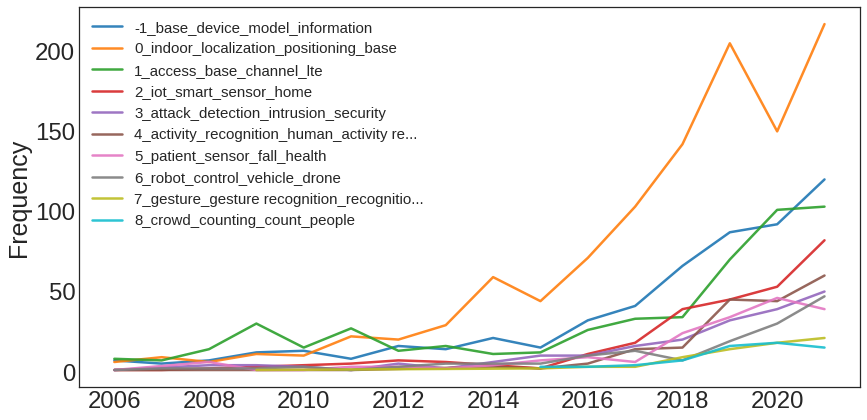

In [18]:
# topics over time is a dataframe with one row for each topic for each year
topics_over_time = topics_over_time[(topics_over_time['Timestamp'] > 2005) & (topics_over_time['Timestamp'] < 2022)]

plt.figure(figsize=(14, 7))

for t, t_name in zip(np.unique(topics_over_time['Topic']), np.unique(topics_over_time['Name'])):
    t_df = topics_over_time[topics_over_time['Topic']==t]
    
    plt.plot()
    plt.plot(t_df['Timestamp'], t_df['Frequency'], linewidth=2.5, alpha=0.9, label=t_name)

plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Frequency', fontsize=25)
plt.legend(fontsize=15)
plt.savefig(FIGURE_FOLDER + '/topic_per_time.png', bbox_inches='tight', dpi=300)
plt.show()

In [19]:
topic_model.visualize_heatmap()

In [20]:
topic_model.update_topics(df['text'], topics, n_gram_range=(2, 3))

print_topics(topic_model, topics)

topic : 0
('indoor localization', 0.020247589980232922)
('indoor positioning', 0.016778211705434438)
('signal strength', 0.011590031565327813)
('receive signal', 0.009098997318647883)
('receive signal strength', 0.008727599160402862)
('base indoor', 0.008102911801852826)
('indoor environment', 0.007668880008135218)
('access point', 0.0066265203687941344)
('near neighbor', 0.005496449456321998)
('location base', 0.0051593568852363785)
topic : 1
('802 11', 0.005923907043819405)
('access point', 0.004862444533085375)
('quality service', 0.004311705581178374)
('unlicensed spectrum', 0.0042284500320178145)
('unlicensed band', 0.003710323454250607)
('real time', 0.003708501836737694)
('resource allocation', 0.0036997992916365523)
('simulation result', 0.0032473962294669715)
('vertical handoff', 0.0031777357853113577)
('cognitive radio', 0.0030486537011243636)
topic : 2
('internet thing', 0.017266725885628616)
('smart home', 0.010792578916285838)
('real time', 0.008838570893507227)
('thing io

In [21]:
topic_model.visualize_hierarchy()

In [22]:
topic_model.visualize_barchart(topics=set(topics))

# Find most representative docs per topic

In [23]:
abs_per_topic = topic_model.get_representative_docs()

In [24]:
index_per_topic = {}
for key, val in abs_per_topic.items():
    if key not in index_per_topic:
        index_per_topic[key] = []
    for abs in val:
        # we assume just one match, hence we take the first element of the index
        index_per_topic[key].append(df[df['text'] == abs].index[0])

In [25]:
index_per_topic

{3: [1478, 47, 513],
 0: [3412, 3044, 473],
 7: [1461, 2296, 2676],
 4: [535, 435, 1560],
 2: [270, 702, 2966],
 1: [1968, 2812, 730],
 8: [1206, 1232, 25],
 6: [353, 1944, 3093],
 5: [1839, 3398, 368]}

In [26]:
title_per_topic = {}
for key, val in index_per_topic.items():
    if key not in title_per_topic:
        title_per_topic[key] = []
    for idx in val:
        title_per_topic[key].append(df['Title'].iloc[idx])
title_per_topic

{3: ['an efficient deep learning model for intrusion classification and prediction in 5g and iot networks',
  'novel intrusion detection system',
  'effective feature selection for hybrid wireless iot network intrusion detection systems using machine learning techniques'],
 0: ['rfid tag indoor localization by fingerprinting methods',
  'improved neighboring reference points selection method for wi-fi based indoor localization',
  'implementation of indoor positioning methods: virtual hospital case'],
 7: ['dynamic hand gesture detection and recognition with wifi signal based on 1d-cnn',
  'dynamic gesture recognition using software defined radio based on smooth pseudo wigner-ville distribution',
  'a robust sign language recognition system with sparsely labeled instances using wi-fi signals'],
 4: ['realization of csi-based human behavior recognition: a survey',
  'a doppler-based human activity recognition system using wifi signals',
  'human activity detection via wifi signals using

# Topic 1

In [27]:
topic_n = 1
topic_idx = [el == topic_n for el in topics]
spec_topic = df.iloc[topic_idx]
spec_topic.head()

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
12,algorithms for addressing line-of-sight issues...,2022,0,Line-of-sight (LOS) is a critical requirement ...,Heuristic algorithms; Infrastructure mobility;...,"Jian Y., Tai C.-L., Venkateswaran S.K., Agarwa...",Article,algorithm address line sight issue mmwave acce...
16,application of mobile edge computing combined ...,2022,0,This paper aims to improve the accuracy and ef...,Convolutional neural network; Deep learning; I...,"Yang Y., Ko Y.C.",Article,application mobile edge computing combine conv...
24,behavior privacy preserving in rf sensing,2022,0,Recent years have witnessed the booming develo...,Authentication; Behavior Recognition; Deep Lea...,"Liu J., Xiao C., Cui K., Han J., Xu X., Ren K.",Article,behavior privacy preserve rf sense recent year...
27,reservoir computing meets extreme learning mac...,2022,0,"In this paper, we consider a real-time deep le...",Artificial neural networks; Extreme Learning M...,"Li L., Liu L., Zhou Z., Yi Y.",Article,reservoir computing meet extreme machine real ...
29,deep learning-based wireless signal classifica...,2022,0,With the development of the Internet of Things...,Attention mechanism; Classification; CNN-LSTM;...,"Roh H., Oh S., Song H., Han J., Lim S.",Article,deep base signal classification iot environmen...


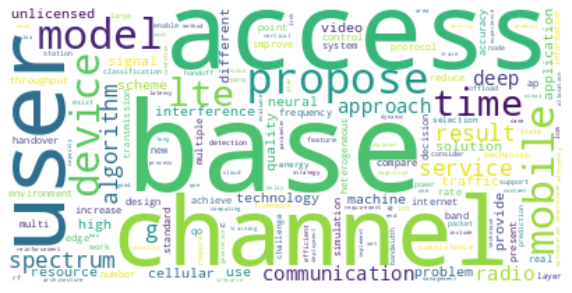

In [28]:
from wordcloud import WordCloud

def plot_wordcloud(text):
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

text = ''.join(spec_topic['text'])
plot_wordcloud(text)

In [29]:
# get most cited papers
spec_topic.sort_values(by='Cited by', ascending=False).head(10)

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
2123,"femtocells: past, present, and future",2012,950,"Femtocells, despite their name, pose a potenti...",3GPP; Cellular Networks; Femtocells; Heterogen...,"Andrews J.G., Claussen H., Dohler M., Rangan S...",Review,femtocell past present future femtocell despit...
2110,cellular traffic offloading through wifi networks,2011,261,Cellular networks are currently facing the cha...,Cellular traffic offloading; delay tolerant; t...,"Dimatteo S., Hui P., Han B., Li V.O.K.",Conference Paper,cellular traffic offload cellular currently fa...
1968,cross-layer-based adaptive vertical handoff wi...,2008,130,A heterogeneous wireless network consists of v...,Adaptive prediction; Cross layer; Heterogeneou...,"Chang B.-J., Chen J.-F.",Article,cross layer base adaptive vertical handoff pre...
3309,coexistence of wifi and lte in unlicensed band...,2015,102,The use of the unlicensed spectrum by LTE netw...,LTE Unlicensed;LTE-U;LAA-LTE;WiFi;coexistence;...,"C. Cano , D. J. Leith",IEEE Conferences,coexistence lte unlicensed band proportional f...
2905,"wifi, lte, or both? measuring multi-homed wire...",2014,91,"Over the past two or three years, wireless cel...",Multi-Network; Mobile Device; LTE; Multi-Path TCP,"Deng S., Netravali R., Sivaraman A., Balakrish...",Proceedings Paper,lte measure multi home internet past year cell...
1888,pricing wifi at starbucks - issues in online m...,2003,87,We consider the problem of designing mechanism...,NaN,"Friedman E.J., Parkes D.C.",Conference Paper,price starbuck issue online mechanism design c...
1930,broadcast-based peer-to-peer collaborative vid...,2007,83,In traditional mobile streaming networks such ...,Ad-hoc; Collaborative streaming; Mobiles; Peer...,"Leung M.-F., Chan S.-H.G.",Article,broadcast base peer peer collaborative video s...
2126,periodic transfers in mobile applications: net...,2012,82,Cellular networks employ a specific radio reso...,3G networks; Periodic transfers; Periodicity d...,"Qian F., Wang Z., Gao Y., Huang J., Gerber A.,...",Conference Paper,periodic transfer mobile application wide orig...
2073,wizi-cloud: application-transparent dual zigbe...,2011,81,The high density ofWiFi Access Points and larg...,NaN,"Jin T., Noubir G., Sheng B.",Conference Paper,wizi cloud application transparent dual zigbee...
1849,proactive resource management for lte in unlic...,2018,79,Performing cellular long term evolution (LTE) ...,deep reinforcement learning; game theory; Lice...,"Challita U., Dong L., Saad W.",Article,proactive resource management lte unlicensed s...


In [30]:
# most representative docs
spec_topic.loc[index_per_topic[topic_n]]

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
1968,cross-layer-based adaptive vertical handoff wi...,2008,130,A heterogeneous wireless network consists of v...,Adaptive prediction; Cross layer; Heterogeneou...,"Chang B.-J., Chen J.-F.",Article,cross layer base adaptive vertical handoff pre...
2812,location based predictive handoff algorithm fo...,2006,0,The proliferation of wireless network technolo...,handover; handoff; streaming media; cellular n...,"Curran K., Cullen G.",Proceedings Paper,location base predictive handoff algorithm mob...
730,a prompt cnn-fl model based on multi criteria ...,2020,1,Purpose: Heterogeneous network is mainly focus...,Convolutional neural network (CNN); Fuzzy logi...,"R G., B S.",Article,prompt cnn fl model base multi criterion smart...


# Topic 3

In [31]:
topic_n = 3
topic_idx = [el == topic_n for el in topics]
spec_topic = df.iloc[topic_idx]
spec_topic.head()

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
0,secure user authentication leveraging keystrok...,2022,0,User authentication plays a critical role in a...,Behavioral features; channel state information...,"Gu Y., Wang Y., Wang M., Pan Z., Hu Z., Liu Z....",Article,secure user authentication leverage keystroke ...
47,novel intrusion detection system,2022,0,Wireless networks are the foundation of modern...,Attacks; Deep neural network; Intrusion detect...,"Mukherjee A., Ammar M., Vigneshwaran P.",Conference Paper,novel intrusion detection foundation modern co...
48,deep learning models for intrusion detection i...,2022,0,"Recently, the number of devices that are conne...",Anomaly detection; AWID dataset; Deep learning...,"Aminanto A.E., Aminanto M.E.",Conference Paper,deep model intrusion detection literature surv...
74,idsdl: a sensitive intrusion detection system ...,2021,0,Device-free passive (DfP) intrusion detection ...,Channel state information (CSI); Convolutional...,"Hu Y., Bai F., Yang X., Liu Y.",Article,idsdl sensitive intrusion detection base deep ...
93,meta-wf: meta-learning-based few-shot wireless...,2021,0,As the common wireless open medium of the Inte...,deep learning; impersonation attack; Internet ...,"Li T., Hong Z., Liu L., Wen Z., Yu L.",Article,meta wf meta base shot impersonation detection...


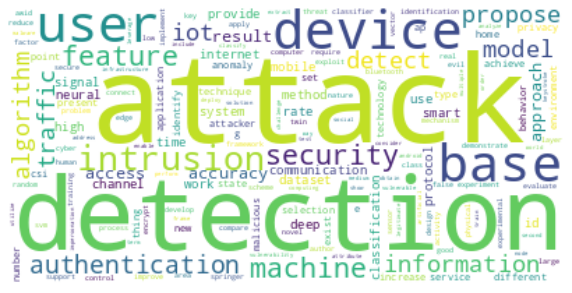

In [32]:
text = ''.join(spec_topic['text'])
plot_wordcloud(text)

In [33]:
# get most cited papers
spec_topic.sort_values(by='Cited by', ascending=False).head(10)

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
2396,intrusion detection in 802.11 networks: empiri...,2016,218,WiFi has become the de facto wireless technolo...,802.11; Attacks; Dataset; Intrusion detection;...,"Kolias C., Kambourakis G., Stavrou A., Gritzal...",Article,intrusion detection 802.11 empirical evaluatio...
2499,anomaly detection in automobile control networ...,2016,178,Modern automobiles have been proven vulnerable...,Anomaly detection; Automotive; Controller area...,"Taylor A., Leblanc S., Japkowicz N.",Conference Paper,anomaly detection automobile control long shor...
2399,analyzing android encrypted network traffic to...,2016,153,Mobile devices can be maliciously exploited to...,NaN,"Conti M., Mancini L.V., Spolaor R., Verde N.V.",Article,analyze android encrypt traffic identify user ...
2177,detection and localization of multiple spoofin...,2013,125,Wireless spoofing attacks are easy to launch a...,attack detection; localization; spoofing attac...,"Yang J., Chen Y.J., Trappe W., Cheng J.",Article,detection localization multiple spoofing attac...
2623,smart user authentication through actuation of...,2017,111,User authentication is a critical process in b...,NaN,"Shi C., Liu J., Liu H., Chen Y.",Conference Paper,smart user authentication actuation daily acti...
2660,deep abstraction and weighted feature selectio...,2017,95,The recent advances in mobile technologies hav...,Deep learning; Feature extraction; Impersonati...,"Aminanto M.E., Choi R., Tanuwidjaja H.C., Yoo ...",Article,deep abstraction weight feature selection impe...
2542,authorship attribution for social media forensics,2017,94,The veil of anonymity provided by smartphones ...,Authorship attribution; computational linguist...,"Rocha A., Scheirer W.J., Forstall C.W., Cavalc...",Review,authorship attribution social medium forensic ...
2917,"internet of things(iot): security challenges, ...",2015,63,The Internet of Things (IoT) represents a dive...,Internet of Things(IoT); Sensors; Bluetooth; S...,"Singh S., Singh N.",Proceedings Paper,internet things(iot security challenge busines...
2003,automatic discovery of botnet communities on l...,2009,57,Botnets are networks of compromised computers ...,Botnet detection; Machine learning; Traffic cl...,"Lu W., Tavallaee M., Ghorbani A.A.",Conference Paper,automatic discovery botnet community large sca...
2272,practical user authentication leveraging chann...,2014,55,User authentication is the critical first step...,Channel state information; User authentication...,"Liu H., Wang Y., Liu J., Yang J., Chen Y.",Conference Paper,practical user authentication leverage channel...


In [34]:
# most representative docs
spec_topic.loc[index_per_topic[topic_n]]

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
1478,an efficient deep learning model for intrusion...,2019,20,A Network Intrusion Detection System is a crit...,autoencoder; computer network security; deep l...,"Rezvy S., Luo Y., Petridis M., Lasebae A., Zeb...",Conference Paper,efficient deep model intrusion classification ...
47,novel intrusion detection system,2022,0,Wireless networks are the foundation of modern...,Attacks; Deep neural network; Intrusion detect...,"Mukherjee A., Ammar M., Vigneshwaran P.",Conference Paper,novel intrusion detection foundation modern co...
513,effective feature selection for hybrid wireles...,2021,2,Through the ascent of online business and the ...,Internet of Things (IoT); Intrusion Detection ...,"Nivaashini M., Thangaraj P., Sountharrajan S.,...",Article,effective feature selection hybrid iot intrusi...


# Topic 6

In [35]:
topic_n = 6
topic_idx = [el == topic_n for el in topics]
spec_topic = df.iloc[topic_idx]
spec_topic

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
32,smart drone controller framework—toward an int...,2022,0,There has been an increasing trend to use mult...,Computer vision; Controller framework; Drones;...,"Veerappan C.S., Loh P.K.K., Chennattu R.J.",Book Chapter,smart drone controller framework internet dron...
44,using machine learning to estimate pedestrian ...,2022,0,Quantifying pedestrian and bicycle traffic is ...,NaN,"Gong Y., Abdel-Aty M.",Article,machine estimate pedestrian bicyclist count in...
50,"automatic object detection, labelling, and loc...",2021,0,This work explores the designing a system of a...,Camera; CNN; Distance; Drone; Object detection...,"Haamied R.D., Al-Abudi B.Q., Hassan R.N.",Article,automatic object detection labelling localizat...
53,a recognition and monitoring algorithm for dro...,2021,0,An algorithm to monitor the control signal of ...,Drone; Frequency hopping sequence; Recognition...,"Li B., Xu Y., Luo J.",Article,recognition monitor algorithm drone remote con...
69,evaluating the quality of high-resolution priv...,2021,0,Travel time to a destination is a key piece of...,Data quality; Floating car; Private sector dat...,"Liu Y., Adebisi A., Li T., Ma J.",Article,evaluate quality high resolution private secto...
...,...,...,...,...,...,...,...,...
3282,system design of high voltage discharge rock b...,2021,0,The application design is to combine the high-...,NaN,"B. Wang , H. Song , H. Li",VDE Conferences,design high voltage discharge rock breaking eq...
3381,wireless-signal-based vehicle counting and cla...,2022,0,Traffic monitoring is key to modern city plann...,Low-cost;machine learning;road traffic monitor...,"R. Kanschat , S. Gupta , A. Degbelo",IEEE Journals,signal base vehicle counting classification di...
3383,design of two dof digital servo system with rn...,2022,0,Deployment of the Internet of Things (IoT) in ...,NaN,"T. Nonomura , F. Fujii",IEEE Conferences,design dof digital servo rnn base dynamic stat...
3393,time delay compensation in a wireless tracking...,2014,1,"In this paper, a wireless tracking control pro...",Networked control systems;Wireless;Delay systems,"W. Zhang , M. Tomizuka , Y. -H. Wei , Q. Leng ...",IEEE Conferences,time delay compensation tracking control previ...


In [36]:
spec_topic.sort_values(by='Cited by', ascending=False)

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
2136,rf-based vehicle detection and speed estimation,2012,60,Developing a robust and reliable vehicle detec...,NaN,"Kassem N., Kosba A.E., Youssef M.",Conference Paper,rf base vehicle detection speed estimation dev...
1046,detection and classification of uavs using rf ...,2020,45,This paper investigates the problem of detecti...,Interference; Machine learning; Markov models;...,"Ezuma M., Erden F., Anjinappa C.K., Ozdemir O....",Article,detection classification uavs rf fingerprint p...
2079,"integrating location tracking, traffic monitor...",2011,44,The new generation of Intelligent Transportati...,NaN,"Faro A., Giordano D., Spampinato C.",Article,integrate location tracking traffic monitoring...
2376,data fusion for its: techniques and research n...,2016,42,Intelligent transportation system (ITS) infras...,Data fusion; Data fusion in ITS; Information f...,"Faouzi N.-E.E., Klein L.A.",Conference Paper,fusion technique need intelligent transportati...
2859,design and implementation of human-robot inter...,2012,40,"With the development of technology, humanoid r...",Humanoid robot; gesture recognition; Kinect; HRI,"Cheng L.Y., Sun Q., Su H., Cong Y., Zhao S.Y.",Proceedings Paper,design implementation human robot interactive ...
...,...,...,...,...,...,...,...,...
739,a classification algorithm for blind uav detec...,2020,0,We consider the problem of detecting and local...,NaN,"Surya Vara Prasad K.N.R., Bhargava V.K.",Conference Paper,classification algorithm blind uav detection w...
728,sensor-fusion and deep neural networks for aut...,2020,0,"With the increase of population in the world, ...",Deep Learning; Orchard Management; Precision A...,"Breslla K., Bortolotti G., Boini A., Perulli G...",Conference Paper,sensor fusion deep neural autonomous uav navig...
588,military reconnaissance and rescue robot with ...,2021,0,In this era of a politically competitive world...,Military robot; Object detection; Robotic arm;...,"Ismail R., Muthukumaraswamy S.",Conference Paper,military reconnaissance rescue robot real time...
586,mobile robot teleoperated through wireless com...,2021,0,This research is focused on providing security...,IP camera; LAN; Streaming; Teleoperated robot;...,"Yarad Jácome M.J., Carguachi Caizatoa J.B.",Conference Paper,mobile robot teleoperate communication video a...


In [37]:
spec_topic['Year'].value_counts()

2021    47
2020    30
2019    19
2017    13
2016    10
2018     7
2015     5
2014     5
2013     5
2022     4
2012     3
2010     3
2008     2
2007     2
2009     2
2011     1
2006     1
1992     1
Name: Year, dtype: int64

# Topics Names

In [38]:
topic_names = {
    0: 'Indoor Localization',
    1: 'ML for Improving Wireless Networks Performance',
    2: 'IoT and Smart Houses',
    3: 'Privacy and Intrusion detection',
    4: 'Human Activity Recognition',
    5: 'Human Condition Monitoring',
    6: 'Wi-Fi and ML for robotics',
    7: 'Gesture Recognition',
    8: 'Crowd Counting and Monitoring',}

# Search most used ML models

In [39]:
possible_models_kwords = [['convolutional', 'cnn'], ['recurrent', 'rnn', 'lstm', 'gru',], ['svm', 'support vector'],  ['neural', 'feedforward', 'mlp', 'perceptron'], ['nearest neighbors', 'knn'], ['transformer', 'encoder'], ['random forest', 'decision tree'], ['reinforcement learning']]
models = {kwords_list[0] : [] for kwords_list in possible_models_kwords}

for i, abs in enumerate(df['text']):
    for kwords_list in possible_models_kwords:
        for kword in kwords_list:
            if kword in abs:
                models[kwords_list[0]].append(i)
                break

{model : len(models[model]) for model in models} 

{'convolutional': 359,
 'recurrent': 227,
 'svm': 293,
 'neural': 1013,
 'nearest neighbors': 287,
 'transformer': 83,
 'random forest': 217,
 'reinforcement learning': 1}

In [40]:
len(models.pop('reinforcement learning'))

1

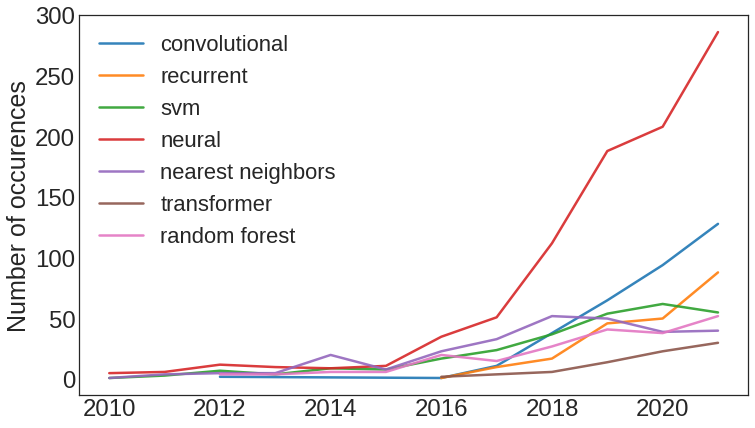

In [41]:

model_per_year = {model : sorted([df['Year'].iloc[i] for i in idxs]) for model, idxs in models.items()}

legend = []
plt.figure(figsize=(12, 7))

for i, (model, years) in enumerate(model_per_year.items()):
    legend.append(model)
    count_years = pd.Series(years).value_counts().sort_index()
    yrs, vls = count_years.index, count_years.values
    # delete oldest articles
    new_yrs, new_vls = [], []
    for y, v in zip(yrs, vls):
        if y > 2009 and y != 2022:
            new_yrs.append(y)
            new_vls.append(v)
    plt.plot(new_yrs, new_vls, linewidth=2.5, alpha=0.9)

plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Number of occurences', fontsize=25)
plt.legend(legend, fontsize=22)
plt.savefig(FIGURE_FOLDER + '/models_per_years_nn.png', bbox_inches='tight', dpi=300)
plt.show()

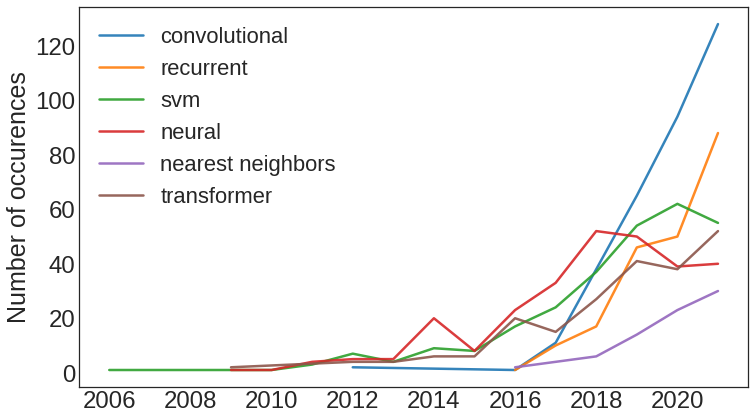

In [42]:
# same without neural
model_per_year = {model : sorted([df['Year'].iloc[i] for i in idxs]) for model, idxs in models.items()}

plt.figure(figsize=(12, 7))

for i, (model, years) in enumerate(model_per_year.items()):
    if model != 'neural':
        count_years = pd.Series(years).value_counts().sort_index()
        yrs, vls = count_years.index, count_years.values
        # delete oldest articles
        new_yrs, new_vls = [], []
        for y, v in zip(yrs, vls):
            if 2005 < y < 2022:
                new_yrs.append(y)
                new_vls.append(v)
        plt.plot(new_yrs, new_vls, label=model, linewidth=2.5, alpha=0.9)

plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Number of occurences', fontsize=25)
plt.legend(legend, fontsize=22)
plt.savefig(FIGURE_FOLDER + '/models_per_years.png', bbox_inches='tight', dpi=300)
plt.show()

In [43]:
model_list_per_topic = {topic : [] for topic in set(topics)}

for model, idxs in models.items():
    for i in idxs:
        model_list_per_topic[topics[i]].append(model)
model_list_per_topic[0]

['convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolutional',
 'convolut

In [44]:
def count_val(list_el):
    res = {}
    for el in list_el:
        if el not in res:
            res[el] = 0
        res[el] += 1
    return res

model_count_per_topic = {key : count_val(model_list) for key, model_list in model_list_per_topic.items()}
model_count_per_topic

{0: {'convolutional': 101,
  'recurrent': 65,
  'svm': 103,
  'neural': 354,
  'nearest neighbors': 241,
  'transformer': 39,
  'random forest': 92},
 1: {'convolutional': 54,
  'recurrent': 35,
  'svm': 11,
  'neural': 159,
  'nearest neighbors': 1,
  'transformer': 8,
  'random forest': 17},
 2: {'convolutional': 7,
  'recurrent': 10,
  'svm': 25,
  'neural': 49,
  'nearest neighbors': 5,
  'transformer': 3,
  'random forest': 11},
 3: {'convolutional': 13,
  'recurrent': 7,
  'svm': 34,
  'neural': 47,
  'nearest neighbors': 5,
  'transformer': 9,
  'random forest': 27},
 4: {'convolutional': 54,
  'recurrent': 43,
  'svm': 32,
  'neural': 82,
  'nearest neighbors': 6,
  'transformer': 4,
  'random forest': 11},
 5: {'convolutional': 15,
  'recurrent': 8,
  'svm': 19,
  'neural': 48,
  'nearest neighbors': 3,
  'transformer': 1,
  'random forest': 13},
 6: {'convolutional': 13,
  'recurrent': 3,
  'svm': 5,
  'neural': 34,
  'nearest neighbors': 6,
  'transformer': 2,
  'random fore

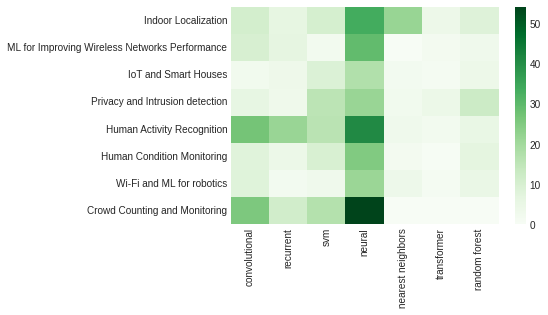

In [45]:
# memento count_df[['Topic', 'Count']] contains topic sizes
# merge topic 0 and 7
def merge_counts(c1, c2):
    for k, v in c2.items():
        if k in c1.keys():
            c1[k] += c2[k]
        else:
            c1[k] = c2[k]
    return c1 

model_count_per_topic[0] = merge_counts(model_count_per_topic[0], model_count_per_topic[7])


import seaborn as sns
cmap = 'Greens'

model_names = list(models.keys())
perc_matr = np.empty((len(set(topics)) - 2, len(model_names)))  # remove topic 7

for topic, val_dict in model_count_per_topic.items():
    if topic != -1 and topic != 7:
        topic_size = count_df[count_df['Topic'] == topic]['Count'].values[0]
        for model in model_names:
            model_idx = list(models.keys()).index(model)
            tmp_index = topic if topic < 7 else topic - 1
            perc_matr[tmp_index, model_idx] = val_dict.get(model, 0) / topic_size * 100

yticks = [topic_names[t] for t in set(topics) if t!=-1 and t != 7]

sns.heatmap(perc_matr, xticklabels=model_names, yticklabels=yticks, cmap=cmap)
plt.savefig(FIGURE_FOLDER + '/ml_models_heatmap_nn.png', bbox_inches='tight', dpi=300)
plt.show()

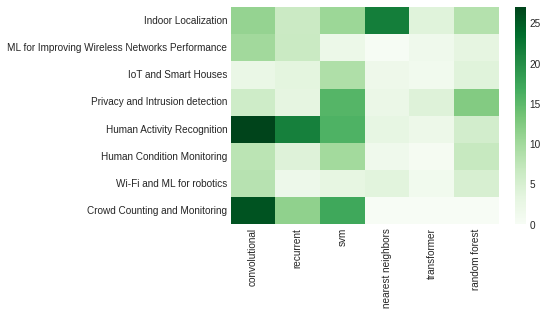

In [46]:
idxs = [i for i, el in enumerate(model_names) if el != 'neural']
perc_matr_no_NN = perc_matr[:, idxs]
model_names_no_NN = [el for el in model_names if el != 'neural']

sns.heatmap(perc_matr_no_NN, xticklabels=model_names_no_NN, yticklabels=yticks, cmap=cmap)
plt.savefig(FIGURE_FOLDER + '/ml_models_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()

# Search specific terms

In [47]:
topic_names

{0: 'Indoor Localization',
 1: 'ML for Improving Wireless Networks Performance',
 2: 'IoT and Smart Houses',
 3: 'Privacy and Intrusion detection',
 4: 'Human Activity Recognition',
 5: 'Human Condition Monitoring',
 6: 'Wi-Fi and ML for robotics',
 7: 'Gesture Recognition',
 8: 'Crowd Counting and Monitoring'}

In [48]:
topic_model.find_topics("csi", top_n=3)

([-1, 8, 4], [0.4748276419029608, 0.4644759941339756, 0.4477810037510662])

In [49]:
topic_model.find_topics("rss", top_n=3)

([2, -1, 3], [0.43781254587857366, 0.4314519454646085, 0.38903700928044976])

In [50]:
topic_model.find_topics("rssi", top_n=3)

([1, -1, 3], [0.3415632064649823, 0.32703338154494155, 0.3008397954679234])

In [51]:
topic_model.find_topics("probe", top_n=3)

([3, 6, -1], [0.3636523171242578, 0.3059264430821622, 0.30360003361504195])

In [52]:
topic_model.find_topics("probe request", top_n=3)

([3, -1, 5], [0.3417635008814458, 0.2680352927185504, 0.23881381300054672])

In [53]:
def count_word(df, substr):
    if type(substr) == str:
        substr = [substr]

    cnt_per_year = {}
    for year, el in zip(df['Year'], df['text']):
        if year not in cnt_per_year.keys():
            cnt_per_year[year] = 0
        #cnt_per_year[year] += el.lower().count(substr)
        for sub in substr:
            if el.lower().count(sub) > 0:
                cnt_per_year[year] += 1
                break

    return cnt_per_year

csi = count_word(df, 'csi')
csi

{2022: 19,
 2021: 134,
 2020: 107,
 2019: 103,
 2018: 43,
 1992: 0,
 2003: 0,
 2004: 0,
 2005: 0,
 2006: 0,
 2007: 0,
 2008: 0,
 2009: 0,
 2010: 0,
 2011: 0,
 2012: 0,
 2013: 0,
 2014: 2,
 2015: 4,
 2016: 10,
 2017: 30}

In [54]:
rss = count_word(df, 'rss')
rss

{2022: 13,
 2021: 127,
 2020: 80,
 2019: 88,
 2018: 67,
 1992: 0,
 2003: 0,
 2004: 0,
 2005: 0,
 2006: 0,
 2007: 2,
 2008: 2,
 2009: 3,
 2010: 3,
 2011: 6,
 2012: 9,
 2013: 9,
 2014: 20,
 2015: 17,
 2016: 37,
 2017: 31}

In [55]:
def plot_word_count(names, use_log, *args, filename=None):
    MARKERS = ['o', 'x', 's', 'd']
    years = sorted(list(args[0].keys()))[1:-1]    # remove 1992 and 2022
    
    plt.figure(figsize=(10, 8))
    alpha = 0.7
    lw = 3

    for i, arg in enumerate(args):
        arg_count = [np.log(arg[y]) if use_log and arg[y] != 0 else arg[y] for y in years]
        arg_smooth = smooth_list(arg_count)
        
        plt.scatter(years, arg_count, alpha=alpha, marker=MARKERS[i])
        plt.plot(years, arg_smooth, linewidth=lw)

    plt.xticks(ticks=[y for i, y in enumerate(years) if i%2 == 0], rotation=45, fontsize=21)
    plt.yticks(fontsize=21)
    if use_log:
        plt.ylabel('Log of the number of articles', fontsize=25)
    else:
        plt.ylabel('Number of articles', fontsize=25)
    plt.legend(names, prop={'size': 25})
    if filename:
        plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()

<Figure size 432x288 with 0 Axes>

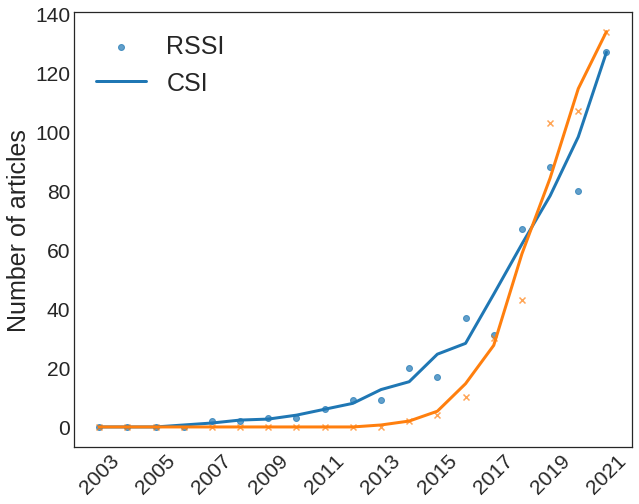

In [56]:
plt.savefig(FIGURE_FOLDER + '/csi_rss.png', bbox_inches='tight', dpi=300)

plot_word_count(['RSSI', 'CSI'], False, rss, csi, filename=FIGURE_FOLDER + '/prova.png')

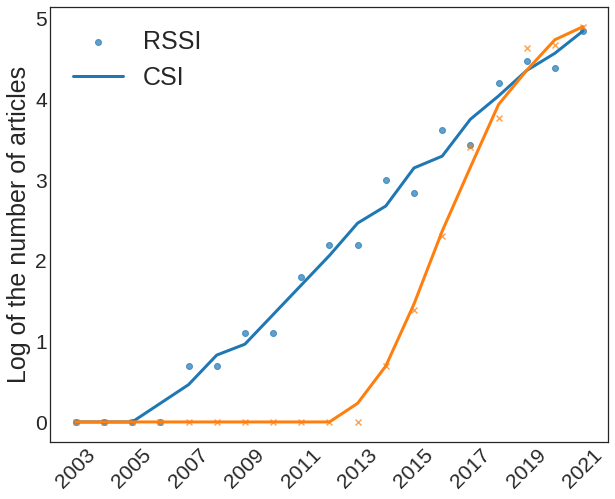

In [57]:
plot_word_count(['RSSI', 'CSI'], True, rss, csi, filename=FIGURE_FOLDER + '/log_csi_rss.png')

In [58]:
passive = count_word(df, ['probe', 'mac addr', 'randomized'])#, 'sensing'])
passive

{2022: 3,
 2021: 13,
 2020: 15,
 2019: 14,
 2018: 6,
 1992: 0,
 2003: 0,
 2004: 0,
 2005: 0,
 2006: 0,
 2007: 0,
 2008: 0,
 2009: 0,
 2010: 1,
 2011: 1,
 2012: 0,
 2013: 4,
 2014: 0,
 2015: 0,
 2016: 7,
 2017: 4}

In [59]:
sum(passive.values())

68

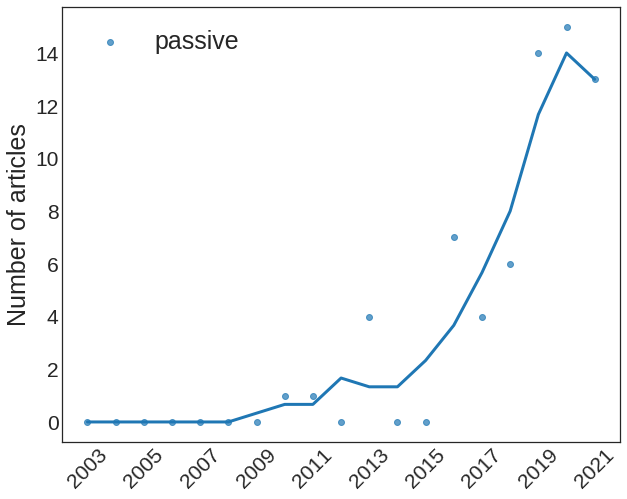

In [60]:
plot_word_count(['passive'], False, passive, filename=FIGURE_FOLDER + '/passive_count.png')

In [61]:
idxs = []
for i, text in enumerate(df['text']):
    if text.count('probe') > 0 or text.count('randomiz') > 0:
        idxs.append(i)

df.iloc[idxs]

,Title,Year,Cited by,Abstract,Author Keywords,Authors,Document Type,text
195,understanding residents' behaviors in a housin...,2021,0,Understanding residents' behaviors in a housin...,Crowd Behaviors; Data mining; Internet of Thin...,"Zhou Y., Koh Z., Kai Kiat Ng B., Liu R., Xin D...",Conference Paper,understand resident behavior housing estate pa...
237,identifying device type from cross channel pro...,2021,0,"Across different Wi-Fi devices, there exist di...",classification; MAC randomization; probe requests,"Praharenka W., Nikolaidis I.",Conference Paper,identify device type cross channel probe reque...
283,ieee 802.11 csi randomization to preserve loca...,2021,2,"Passive, device-free localization of a person ...",Channel state information; Experiments and mea...,"Cominelli M., Kosterhon F., Gringoli F., Lo Ci...",Article,802.11 csi randomization preserve location pri...
402,estimating bus cross-sectional flow based on m...,2021,1,"With expansion of city scale, the issue of pub...",Bus passenger flow estimation; Feature extract...,"Chen T.-Z., Chen Y.-Y., Lai J.-H.",Article,estimate bus cross sectional flow base machine...
455,mobintel: passive outdoor localization via rss...,2021,1,Effective planning requires understanding the ...,Mobility intelligence; passive localization; R...,"Bao F., Mazokha S., Hallstrom J.O.",Conference Paper,mobintel passive outdoor localization rssi mac...
487,iot and biosensors: a smart portable potentios...,2021,0,Recent advances in Internet-of-Things technolo...,Amperometric sensors; biosensors; cloud servic...,"Bianchi V., Boni A., Bassoli M., Giannetto M.,...",Article,iot biosensor smart portable potentiostat adva...
607,classification of abnormal traces in a collabo...,2021,0,A large number of fog nodes located at a netwo...,Communication; Fog computing; Intrusion detect...,"Meng Q., Zheng H., Guo H.",Conference Paper,classification abnormal trace collaborative fo...
714,neura: using neural networks to improve wifi r...,2020,4,Although a variety of rate adaptation algorith...,802.11; frame aggregration; link adaptation; n...,"Khastoo S., Brecht T., Abedi A.",Conference Paper,neura neural improve rate adaptation variety r...
772,csiscan: learning csi for efficient access poi...,2020,0,Network densification through the deployment o...,NaN,"Sankhe K., Jaisinghani D., Chowdhury K.",Conference Paper,csiscan csi efficient access point discovery d...
776,iot based classification techniques for soil c...,2020,6,Agriculture aided by IoT is called Smart Agric...,Agriculture; Crop yield; IoT; Recommendation; ...,"Reshma R., Sathiyavathi V., Sindhu T., Selvaku...",Conference Paper,iot base classification technique soil content...


In [62]:
len(idxs), df.iloc[idxs]['Cited by'].sum(), df.iloc[idxs]['Cited by'].sum() / len(idxs)

(53, 597, 11.264150943396226)